# Problem Set 4: Root-Finding and Optimization

## Exercise 1: Testing algorithms with the Rosenbrock function


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm
import quantecon as qe  
from scipy import optimize
import quantecon as qe

#%% Exercise 1: Testing algorithms with the Rosenbrock function

# a. define the Rosenbrock function for a general N-dimension. (You need to create the function, if you directly import it from somewhere else you will get a 0 for the whole exercise)
def rosen_Nd(X):
    '''Rosenbrock function for N
    f(x) = SUM_i[ (1-xi)+ (x(i+i)-xi)**2
    '''
    y = []
    for i in range(0,len(X)-1):
        yi = (1-X[i])**2+(X[i+1]-X[i]**2)**2
        y.append(yi)
    return sum(y)


print('b. Testing the Brute force algorithm.')
# case 1: N=3
ranges_X = ((-2,2),(-2,2),(-2,2))
print('Brute-force method N=3---------')
qe.tic()
res1 = optimize.brute(rosen_Nd, ranges_X)
qe.toc()
print(res1)

# case 2: N=4
ranges_X = ((-2,2),(-2,2),(-2,2),(-2,2))
print('Brute-force method N=4---------')
qe.tic()
res1 = optimize.brute(rosen_Nd, ranges_X)
qe.toc()
print(res1)

# case 3: N=5
ranges_X = ((-2,2),(-2,2),(-2,2),(-2,2),(-2,2))
print('Brute-force method N=5---------')
qe.tic()
res1 = optimize.brute(rosen_Nd, ranges_X)
qe.toc()
print(res1)
print('            ')
print('Comment 1b: As the number of dimensions increases linearly, the computational time increases exponentially. A search method creates a grid of points to evaluate the function, say x points. As the number of dimensions increases, the number of points to be checked increases by x^N. That is why search methods are inefficient when the number of variables is large.')
print('            ')
print('            ')

print('c. Find the minimum of the Rosenbrock function with N=30. Use BFGS, Nelder-Mead and Powell.')
# BFGS
x0 = np.zeros(30)
print('BFGS method ---------')
qe.tic()
res2 = optimize.minimize(rosen_Nd,x0, method='BFGS')  
qe.toc()
print(res2.x)

# Nelder-Mead
print('Nelder-Mead method ---------')
qe.tic()
res3 = optimize.minimize(rosen_Nd,x0, method='nelder-mead')  
print(res3.x)
qe.toc()


print('Powell method ---------')
qe.tic()
res5 = optimize.minimize(rosen_Nd,x0, method='powell') 
print(res5.x)
qe.toc()
print('   ')
print('Comment 1c: The BFGS method reaches the minimum and is more than 10 times faster than the Powell method. The Nelder-Mead method does not converge to the minimum with the default setting.')
print('   ')
print('   ')


print('d. testing the algorithms further. Solve the Rosenbrock function for N=100.')
x0 = np.zeros(100)
print('BFGS method ---------')
qe.tic()
res2 = optimize.minimize(rosen_Nd,x0, method='BFGS')  
qe.toc()
print(res2.x)


# Nelder-Mead
print('Nelder-Mead method ---------')
qe.tic()
res3 = optimize.minimize(rosen_Nd,x0, method='nelder-mead')  
print(res3.x)
qe.toc()


print('Powell method ---------')
qe.tic()
res5 = optimize.minimize(rosen_Nd,x0, method='powell') 
print(res5.x)
qe.toc()

# e. For this exercise we saw that there is one algorithm that tends to to do better than the rest (especially when N is large).
# which algorithm is and why? you might want to comment on the properties of the function we are minimizing and the properties/characteristics
# of the algoritm
print('            ')
print('Comment 1e: The algorithm that does better is the BFGS method. Note that this minimization problem takes a function that is continuous, differentiable and with a unique global minimum. Consequently, derivative-based local optimization methods as the BFGS method perform better especially when the number of dimensions is large. For other optimization problems, rugged functions with multiple minima, discountinuities, no derivatives, etc. Powell, Nelder-Mead and Brute-Force might work better.')


b. Testing the Brute force algorithm.
Brute-force method N=3---------
TOC: Elapsed: 0:00:0.07
[1.00000773 1.00000816 0.99998657]
Brute-force method N=4---------
TOC: Elapsed: 0:00:1.32
[1.00001192 0.99999483 0.99999232 0.9999744 ]
Brute-force method N=5---------
TOC: Elapsed: 0:00:33.00
[1.00002079 1.00002544 1.00002247 1.00002408 0.99997355]
            
Comment 1b: As the number of dimensions increases linearly, the computational time increases exponentially. A search method creates a grid of points to evaluate the function, say x points. As the number of dimensions increases, the number of points to be checked increases by x^N. That is why search methods are inefficient when the number of variables is large.
            
            
c. Find the minimum of the Rosenbrock function with N=30. Use BFGS, Nelder-Mead and Powell.
BFGS method ---------
TOC: Elapsed: 0:00:0.20
[0.99999997 0.99999996 0.99999998 0.99999999 0.99999997 0.99999996
 0.99999999 0.99999998 0.99999999 0.99999998 0.9

## Exercise 2: steady states and transitions in a Solow economy

2a =========
The saving rates (s) and TFP (A) are:
s= 0.40
A= 3.31
Under the steady state, capital per worker and ouptut per worker are
k= 40.00
y= 10.00
2b =========
the new capital per worker value at steady state is
k= 107.67
the new output per worker value at steady state is
y= 26.92
output growth
g= 1.69
2c =========
with epsilon=0.5, it takes 70 periods to converge to the new steady state


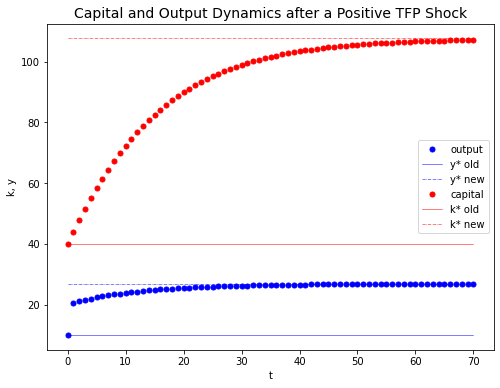

In [15]:
#%% Exercise2: Steady states and transitions in a Solow economy

alpha=0.3
delta = 0.1
params = [alpha,delta]

# Define the system of equations
def steady_state_a(X, params):
    # note that s is a vector with size 3: the three saving rates for each country.
    alpha,delta = params
    s,A = X
    # from the Solow model we know that k* for each country k* is.
    k1 = (s*A/delta)**(1/(1-alpha))

    eq_1 = A*k1**(alpha) - 10
    eq_2 = k1/(A*k1**(alpha))  - 4
    
    return  np.array([eq_1, eq_2])

# use as starting values
x0=[0.25,2.5]   # note that s must take a value btw 0,1 and A needs to be positive.
roots = optimize.fsolve(steady_state_a, x0, args=params)

s_star, A_star = roots
print('2a =========')
print('The saving rates (s) and TFP (A) are:')
print('s=',"%.2f" % s_star)
print('A=',"%.2f" % A_star)

print('Under the steady state, capital per worker and ouptut per worker are')
k_s = (s_star*A_star/delta)**(1/(1-alpha))
y_s = A_star*k_s**(alpha)
print('k=',"%.2f" % k_s)
print('y=',"%.2f" % y_s)
# our root-finding worked well

print('2b =========')
A_old = A_star
A = 2*A_old
s = s_star

# Capital per worker in the new steady state
print('the new capital per worker value at steady state is')
k_s2 = (s*A/delta)**(1/(1-alpha))
print('k=',"%.2f" % k_s2)
print('the new output per worker value at steady state is')
y_new = A*k_s2**(alpha)
print('y=',"%.2f" % y_new)

g= (y_new-y_s)/y_s
print('output growth')
print('g=',"%.2f" % g)
# Capital per worker in the new steady state


print('2c =========')
# to do that first note that the law of motion of capital in solow is given by
params = s,A,alpha,delta

def law_of_motion(k,params):
    s,A,alpha,delta=params
    return s*A*k**alpha+(1-delta)*k

# then use a while loop where we start with the capital in steady state at a, and computes the new capital value (given by the law of motion and that now A=1)
# until it reaches the point where the new capital is approximately equal to te steady state in the case b. For each iteration store the iteration number (to count the periods), the capital
# and the output

eps=0.5

t=0
k = k_s

k_path = [k_s]
y_path = [y_s]

while np.abs(k-k_s2)>= eps:
    k_new = law_of_motion(k,params)
    k_path.append(k_new)
    y_path.append(A*k_new**(alpha))
    k = np.copy(k_new)
    t+=1
    if t>1000:
        break

N_periods = t    
  
# how many periods t does it take to the economy to reach the new steady state?
# plot the dynmics of capital and output.  
print('with epsilon=0.5, it takes 70 periods to converge to the new steady state') 

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(0,N_periods+1), y_path, linewidth=2.0, color='blue',linestyle='None', marker='.', markersize = 10.0,label='output')
ax.plot(range(0,N_periods+1), y_s*np.ones(N_periods+1), linewidth=.5, linestyle='solid', color='blue',label='y* old')
ax.plot(range(0,N_periods+1), y_new*np.ones(N_periods+1), linewidth=.5,linestyle='dashdot', color='blue',label='y* new')

ax.plot(range(0,N_periods+1), k_path, linewidth=2.0, color='red',linestyle='None', marker='.', markersize = 10.0,label='capital')
ax.plot(range(0,N_periods+1), k_s*np.ones(N_periods+1), linewidth=.5, linestyle='solid', color='red',label='k* old')
ax.plot(range(0,N_periods+1), k_s2*np.ones(N_periods+1), linewidth=.5,linestyle='dashdot', color='red',label='k* new')
ax.set_xlabel('t')
ax.set_ylabel('k, y')
ax.legend()
ax.set_title('Capital and Output Dynamics after a Positive TFP Shock', fontsize=14)
plt.show()

## Exercise 3: optimal life-cycle consumption paths

3a ===========
TOC: Elapsed: 0:00:0.00
c0*= 7.55
c1*= 7.55
a1*= 2.45


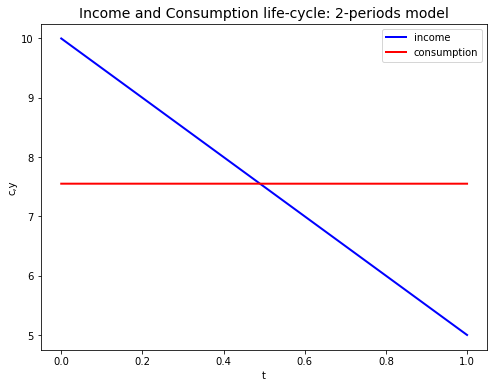

3b ===========
TOC: Elapsed: 0:00:0.00


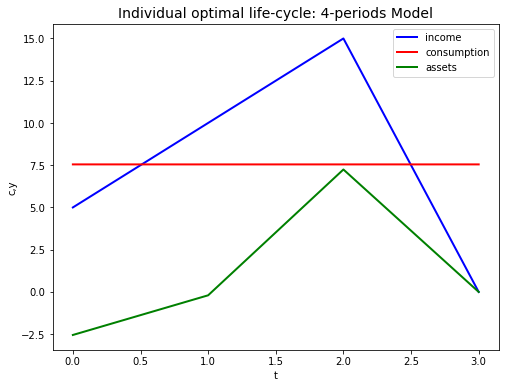

Comment: not asked in the exercise but I also include the assets (a) life-cycle
Optimal consumption r= 0.01
TOC: Elapsed: 0:00:0.00
Optimal consumption r= 0.04
TOC: Elapsed: 0:00:0.00
Optimal consumption r= 0.08
TOC: Elapsed: 0:00:0.00
3c ===========


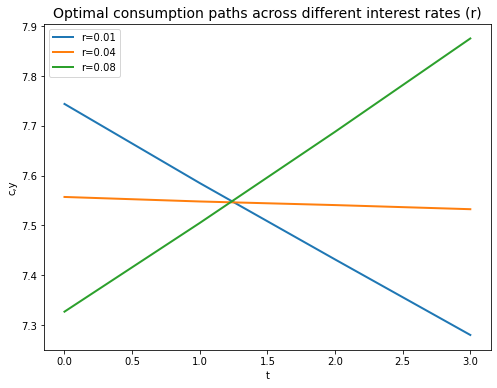

Note that in the case of r=0.04, the returns of savings is close to the disutility cost of saving (1-beta), consumption is close to flat along the life-cycle.
While for case of r=0.01 the returns of savings are lower than the impatience factor: the invidual optimally consumes more "today" than "tomorrow". 
For case of r=0.08, the individual is better-off consuming more "tomorrow" than "today". 
3d ======
Optimal consumption paths under uncertainty---------
TOC: Elapsed: 0:00:0.00


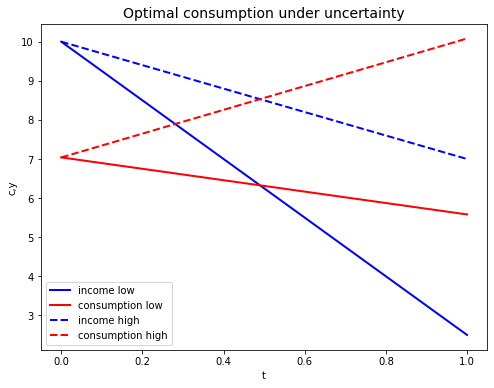

3e ======
Note that exercise d) is analogous to a) but with uncertainty.
The optimal savings under certainty (3a) were
a1*= 2.45
The optimal savings under uncertainty (3d) are
a1*= 2.96
Thus risk increased savings by 20.84 %
Since now the world is risky, the individual wants to save a little bit more today in case tomorrow he/she suffers the bad income shock, he/she can cope with the shock with the extra-savings. These savings that are motivated to cope with risk are referred as precautionary savings in the economics literature.


In [45]:
#%% Exercise 3. Invidiual life-time maximization problem

# Optimal consumption path in a two periods problem 
# c0 +a(1) = a_0 +y1
#  c1  = (1+r)a_1 +y2

# parameter values
beta = 0.96
r= 1/beta-1
a0 = 0
y = [10, 5]

# per period utility function
def u_crra(c,theta=1.5):
    
    if c<0.00001:
        return -np.infty  
    if theta==1:
        return np.log(c) 
    else:
        return  (c**(1-theta))/(1-theta)

params = [u_crra, beta, r, a0, y]

# lifetime utility: the function to minimize
def U(c0,params):
   u, beta, r, a0, y = params  
   
   c1 = (1+r)*(a0+y[0]-c0)+y[1]  #  rewrite the problem in terms of unconstrained maximization for 1 variable
   
   return -(u(c0)+beta*u(c1))  # and I include the minus since we are maximizing utility!


x0 = y[0]
print('3a ===========')
qe.tic()
res = optimize.minimize(U,x0, method='BFGS', args=params)  
qe.toc()

c0_star = res.x
c1_star = (1+r)*(a0+y[0]-c0_star)+y[1]
c_star = [c0_star,c1_star]
print('c0*=',"%.2f" % c0_star)
print('c1*=',"%.2f" % c1_star)
a1_a = a0+y[0]-c0_star
print('a1*=',"%.2f" % a1_a)
a_star = [a0,a1_a]

# plot the lifecycle of income and consumption. that is a line plot where x=0,1, line-1 is y0, y1, line-2 is c0, c1.
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,2), y, linewidth=2.0, color='b',label='income')
ax.plot(range(0,2), c_star, linewidth=2.0, color='r',label='consumption')
#ax.plot(range(0,2), a_star, linewidth=2.0, color='r',label='consumption')
ax.set_xlabel('t')
ax.set_ylabel('c,y')
ax.legend()
ax.set_title('Income and Consumption life-cycle: 2-periods model', fontsize=14)
plt.show()


# b. Let's extend the problem to a lifecycle of 4 periods.

# 4 periods
#  c0 +a(1) = a_0 +y0
#  c1 +a(2) = (1+r)a_1 +y1
#  c2 +a(3) = (1+r)a_1 +y1
#  c4  = (1+r)a_1 +y1

y = [5, 10, 15, 0]
params = [u_crra, beta, r, a0, y]

# lifetime utility
def U_t4(C,params):
   u, beta, r, a0, y = params  
   c0, c1, c2 = C
   a1 = a0 +y[0] -c0            # rewrite the problem in terms of unconstrained maximization for 3 variables
   a2 = (1+r)*(a1)+y[1] -c1
   c3 = (1+r)*((1+r)*a2+y[2]-c2)   
   # note the recurisvety in the problem
   
   return -(u(c0) +beta*u(c1) +beta**2*u(c2) +beta**3*u(c3))   #don't forget the minus!


# educated initial guess (ie close to average income per period)
x0 = [8,8,8]

print('3b ===========')
qe.tic()
res = optimize.minimize(U_t4,x0, method='BFGS', args=params)  
qe.toc()

c0_star, c1_star, c2_star = res.x
a1 = a0 +y[0] -c0_star
a2 = (1+r)*(a1)+y[1] -c1_star
c3_star = (1+r)*((1+r)*a2+y[2]-c2_star)
a3 = (1+r)*a2+y[2]-c2_star
c_star = [c0_star,c1_star,c2_star,c3_star]
a1 = a0+y[0]-c0_star
a_star = [a1,a2,a3,0]


# plot the lifecycle of income and consumption. 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,4), y, linewidth=2.0, color='b',label='income')
ax.plot(range(0,4), c_star, linewidth=2.0, color='r',label='consumption')
ax.plot(range(0,4), a_star, linewidth=2.0, color='g',label='assets')
ax.set_xlabel('t')
ax.set_ylabel('c,y')
ax.legend()
ax.set_title('Individual optimal life-cycle: 4-periods Model', fontsize=14)
plt.show()

print('Comment: not asked in the exercise but I also include the assets (a) life-cycle')


# c. Comparative statics. Plot  How does the optimal lifecycle consumption changes as r changes? 

y = [5, 10, 15, 0]

c_vecs=[]
a_vecs=[]
r_list = [0.01, 0.04, 0.08]
for r in r_list:

    params = [u_crra, beta, r, a0, y]
    x0 = [8,8,8]
    
    print('Optimal consumption r=',r)
    qe.tic()
    res = optimize.minimize(U_t4,x0, method='BFGS', args=params)  
    qe.toc()
    
    c0_star, c1_star, c2_star = res.x
    a1 = a0 +y[0] -c0_star
    a2 = (1+r)*(a1)+y[1] -c1_star
    c3_star = (1+r)*((1+r)*a2+y[2]-c2_star)
    a3 = (1+r)*a2+y[2]-c2_star
    c_star = [c0_star,c1_star,c2_star,c3_star]
    a1 = a0+y[0]-c0_star
    a_star = [a1,a2,a3,0]
    
    c_vecs.append(c_star)
    a_vecs.append(a_star)

print('3c ===========')

# plot optimal consumption paths across different interest rates
fig, ax = plt.subplots(figsize=(8,6))
for i,r in enumerate(r_list):
    ax.plot(range(0,4), c_vecs[i], linewidth=2.0,label='r='+str(r))
ax.set_xlabel('t')
ax.set_ylabel('c,y')
ax.legend()
ax.set_title('Optimal consumption paths across different interest rates (r)', fontsize=14)
plt.show()

print('Note that in the case of r=0.04, the returns of savings is close to the disutility cost of saving (1-beta), consumption is close to flat along the life-cycle.')
print('While for case of r=0.01 the returns of savings are lower than the impatience factor: the invidual optimally consumes more "today" than "tomorrow". ')
print('For case of r=0.08, the individual is better-off consuming more "tomorrow" than "today". ')



# d. The previous exercise was the case of a world with certainty. 

# now let's solve the original 2-period model with uncertainty.

beta = 0.96
r= 1/beta-1
a0 = 0

y0 = 10
p_y1 = [0.5, 0.5]
y1 = [2.5, 7,5]

def U(c0,params):
   u, beta, r, a0, y0, y1, p_y1 = params  
   
   c1_1 = (1+r)*(a0+y0-c0)+y1[0]    # there are two possible scenarios tomorrow. That means two possible consumption
   c1_2 = (1+r)*(a0+y0-c0)+y1[1]
   
   return -(u(c0)+beta*(np.sum(p_y1[0]*u(c1_1) +p_y1[1]*u(c1_2))))  # the two possible consumptions imply two possible utilities that we weight for the probability to happen.



params = [u_crra, beta, r, a0, y0, y1, p_y1]
x0 = y0
print('3d ======')

print('Optimal consumption paths under uncertainty---------')
qe.tic()
res = optimize.minimize(U,x0, method='BFGS', args=params)  
qe.toc()

c0_star = res.x
c11_star = (1+r)*(a0+y0-c0_star)+y1[0]
c12_star = (1+r)*(a0+y0-c0_star)+y1[1]

c_star_l = [c0_star,c11_star]
c_star_h = [c0_star,c12_star]
a1 = a0+y0-c0_star
a_star = [a0,a1]


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(0,2), [y0, y1[0]], linewidth=2.0, color='b',label='income low')
ax.plot(range(0,2), c_star_l, linewidth=2.0, color='r',label='consumption low')
ax.plot(range(0,2), [y0, y1[1]], linewidth=2.0, color='b', linestyle='dashed',label='income high')
ax.plot(range(0,2), c_star_h, linewidth=2.0, color='r',linestyle='dashed',label='consumption high')
ax.set_xlabel('t')
ax.set_ylabel('c,y')
ax.legend()
ax.set_title('Optimal consumption under uncertainty', fontsize=14)
plt.show()


print('3e ======')

print('Note that exercise d) is analogous to a) but with uncertainty.')
print('The optimal savings under certainty (3a) were')
print('a1*=',"%.2f" % a1_a)
print('The optimal savings under uncertainty (3d) are')
print('a1*=',"%.2f" % a1)

g_a = (a1-a1_a)/a1_a*100
print('Thus risk increased savings by',"%.2f" % g_a,'%')


print('Since now the world is risky, the individual wants to save a little bit more today in case tomorrow he/she suffers the bad income shock, he/she can cope with the shock with the extra-savings. These savings that are motivated to cope with risk are referred as precautionary savings in the economics literature.')


